# Usage

- loads generated data from test dataset
- plots scores distributions
- calculates similarity metrics

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bert_score import score
from rouge_score import rouge_scorer

# Load the test data together with the generated scores and reports

In [4]:
df = pd.read_pickle("combined_df_test_and_results.pkl")
df.shape

(1028, 10)

In [5]:
df.head()

,resume,job,score,report,prompt,res_and_job,score_and_report,generated_report,score_from_report,report_from_report
145,kavya baltha data scientist linkedin i summary...,about you you love breaking down complex probl...,0.85,The candidate has a Master's in Computer Scien...,<<RESUME>> kavya baltha data scientist linkedi...,<<RESUME>> kavya baltha data scientist linkedi...,"<<SCORE>> 0.85, <<REPORT>> The candidate has a...","<<SCORE>> 0.8, <<REPORT>> The candidate has a ...",0.80,The candidate has a strong background in data ...
1628,john yoo software engineer 10 2022 02 2023 xac...,what you ll do understand design iterate and s...,0.7,The candidate has a strong background in softw...,<<RESUME>> john yoo software engineer 10 2022 ...,<<RESUME>> john yoo software engineer 10 2022 ...,"<<SCORE>> 0.7, <<REPORT>> The candidate has a ...","<<SCORE>> 0.8, <<REPORT>> The candidate has a ...",0.80,The candidate has a strong background in softw...
1641,sairam tabibu seattle wa email me on indeed wi...,you have 8 years of experience designing modif...,0.8,The candidate has a strong background in softw...,<<RESUME>> sairam tabibu seattle wa email me o...,<<RESUME>> sairam tabibu seattle wa email me o...,"<<SCORE>> 0.8, <<REPORT>> The candidate has a ...","<<SCORE>> 0.85, <<REPORT>> The candidate has a...",0.85,The candidate has a strong educational backgro...
1802,144 lewis street valley stream ny 11 marie gre...,who you ll work with as an engineer you will w...,0.7,The resume is a good match for the job. The ca...,<<RESUME>> 144 lewis street valley stream ny 1...,<<RESUME>> 144 lewis street valley stream ny 1...,"<<SCORE>> 0.7, <<REPORT>> The resume is a good...","<<SCORE>> 0.8, <<REPORT>> The candidate has a ...",0.80,The candidate has a strong background in data ...
1819,hardhika venkatesan data scientist lewis cente...,job title sr software quality engineer android...,0.7,The candidate has a strong background in data ...,<<RESUME>> hardhika venkatesan data scientist ...,<<RESUME>> hardhika venkatesan data scientist ...,"<<SCORE>> 0.7, <<REPORT>> The candidate has a ...","<<SCORE>> 0.8, <<REPORT>> The candidate has a ...",0.80,The candidate has a strong background in data ...


In [8]:
#convert the score column into float
df['score'] = df['score'].astype(float)

In [9]:
df.score.describe()

count    1028.000000
mean        0.747325
std         0.084972
min         0.200000
25%         0.700000
50%         0.800000
75%         0.800000
max         0.900000
Name: score, dtype: float64

In [7]:
df.score_from_report.describe()

count    1028.000000
mean        0.781615
std         0.046467
min         0.700000
25%         0.800000
50%         0.800000
75%         0.800000
max         0.850000
Name: score_from_report, dtype: float64

# Plot score and generated score distribution

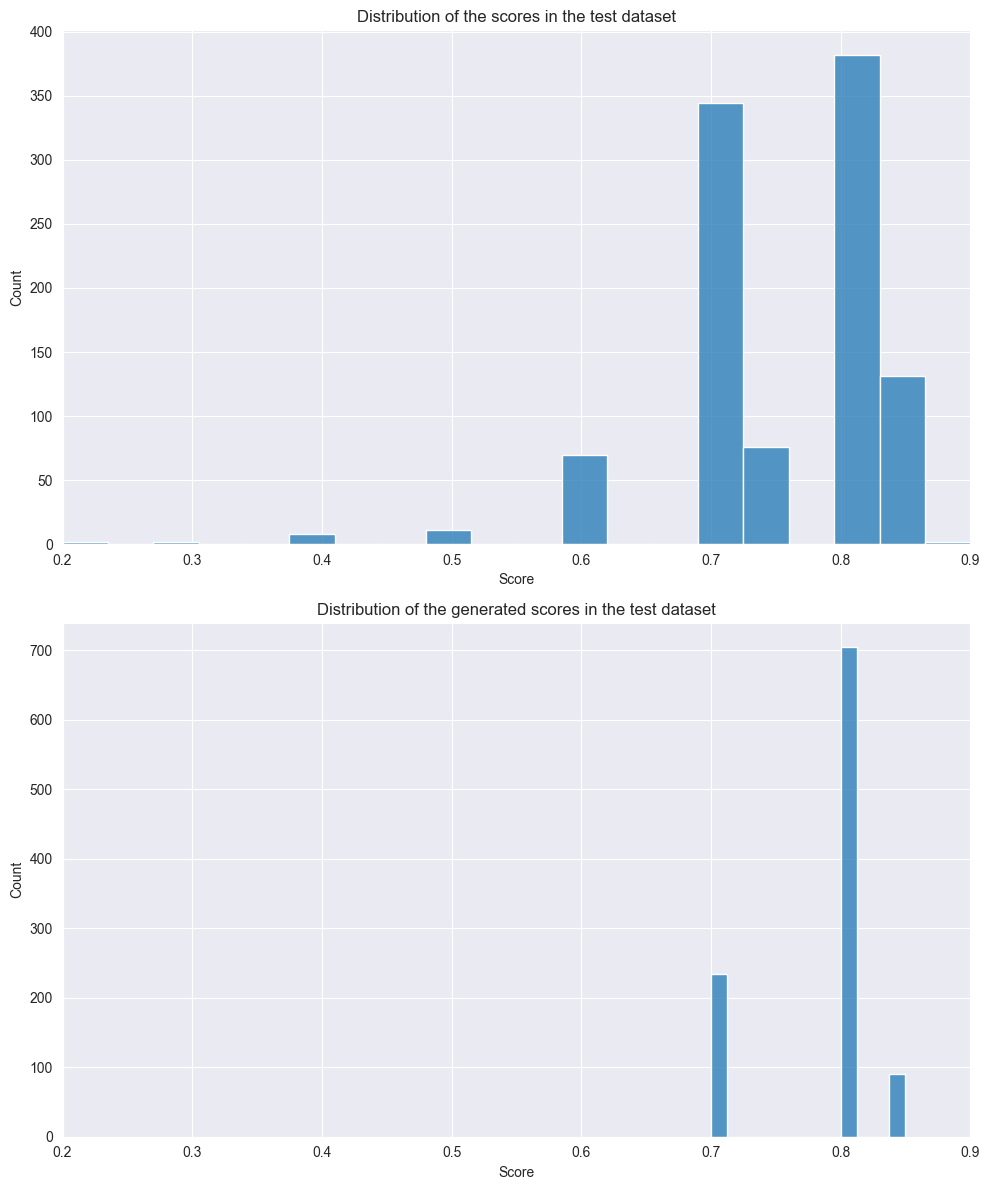

In [26]:
sns.set_style("darkgrid")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

sns.histplot(df['score'], bins=20, ax=ax1)
ax1.set_title("Distribution of the scores in the test dataset")
ax1.set_xlabel("Score")
ax1.set_ylabel("Count")
ax1.set_xlim(0.2, 0.9)

sns.histplot(x=df['score_from_report'], ax=ax2)
ax2.set_title("Distribution of the generated scores in the test dataset")
ax2.set_xlabel("Score")
ax2.set_ylabel("Count")
ax2.set_xlim(0.2, 0.9)

plt.tight_layout()
# plt.savefig("combined_score_distributions.png")
plt.show()


In [27]:
df.head()


,resume,job,score,report,prompt,res_and_job,score_and_report,generated_report,score_from_report,report_from_report
145,kavya baltha data scientist linkedin i summary...,about you you love breaking down complex probl...,0.85,The candidate has a Master's in Computer Scien...,<<RESUME>> kavya baltha data scientist linkedi...,<<RESUME>> kavya baltha data scientist linkedi...,"<<SCORE>> 0.85, <<REPORT>> The candidate has a...","<<SCORE>> 0.8, <<REPORT>> The candidate has a ...",0.80,The candidate has a strong background in data ...
1628,john yoo software engineer 10 2022 02 2023 xac...,what you ll do understand design iterate and s...,0.70,The candidate has a strong background in softw...,<<RESUME>> john yoo software engineer 10 2022 ...,<<RESUME>> john yoo software engineer 10 2022 ...,"<<SCORE>> 0.7, <<REPORT>> The candidate has a ...","<<SCORE>> 0.8, <<REPORT>> The candidate has a ...",0.80,The candidate has a strong background in softw...
1641,sairam tabibu seattle wa email me on indeed wi...,you have 8 years of experience designing modif...,0.80,The candidate has a strong background in softw...,<<RESUME>> sairam tabibu seattle wa email me o...,<<RESUME>> sairam tabibu seattle wa email me o...,"<<SCORE>> 0.8, <<REPORT>> The candidate has a ...","<<SCORE>> 0.85, <<REPORT>> The candidate has a...",0.85,The candidate has a strong educational backgro...
1802,144 lewis street valley stream ny 11 marie gre...,who you ll work with as an engineer you will w...,0.70,The resume is a good match for the job. The ca...,<<RESUME>> 144 lewis street valley stream ny 1...,<<RESUME>> 144 lewis street valley stream ny 1...,"<<SCORE>> 0.7, <<REPORT>> The resume is a good...","<<SCORE>> 0.8, <<REPORT>> The candidate has a ...",0.80,The candidate has a strong background in data ...
1819,hardhika venkatesan data scientist lewis cente...,job title sr software quality engineer android...,0.70,The candidate has a strong background in data ...,<<RESUME>> hardhika venkatesan data scientist ...,<<RESUME>> hardhika venkatesan data scientist ...,"<<SCORE>> 0.7, <<REPORT>> The candidate has a ...","<<SCORE>> 0.8, <<REPORT>> The candidate has a ...",0.80,The candidate has a strong background in data ...


In [32]:
df.iloc[0].report


"The candidate has a Master's in Computer Science and 3 years of experience as a Data Scientist. They have experience in data extraction, data modeling, data wrangling, statistical modeling, machine learning, and data visualization. They are proficient in various stages of the software development life cycle (SDLC) and have experience in implementing waterfall and agile methodologies. They have good experience in machine learning regression algorithms, data packages, and data visualization tools. They are also skilled in database management with hands-on experience in SQL Server and MySQL. \n\nThe candidate's skills and experience are highly relevant to the job requirements. They have experience working with APIs and back-end technologies, strong system design skills, and experience working with distributed systems. They have experience working with NodeJS, PostgreSQL, Redis, and Git. They are familiar with various API authentication and authorization methods, particularly OAuth. They 

# Feedback report from PALM-2

"The candidate has a Master's in Computer Science and 3 years of experience as a Data Scientist. They have experience in data extraction, data modeling, data wrangling, statistical modeling, machine learning, and data visualization. They are proficient in various stages of the software development life cycle (SDLC) and have experience in implementing waterfall and agile methodologies. They have good experience in machine learning regression algorithms, data packages, and data visualization tools. They are also skilled in database management with hands-on experience in SQL Server and MySQL. \n\nThe candidate's skills and experience are highly relevant to the job requirements. They have experience working with APIs and back-end technologies, strong system design skills, and experience working with distributed systems. They have experience working with NodeJS, PostgreSQL, Redis, and Git. They are familiar with various API authentication and authorization methods, particularly OAuth. They have experience using a cloud provider (AWS) and a distributed messaging system. They also have strong knowledge of testing best practices.\n\nOverall, the candidate is a strong match for the job and has the skills and experience to be successful in the role."



In [31]:
df.iloc[0].report_from_report

"The candidate has a strong background in data science and machine learning, with a Master's degree in Computer Science from George Mason University and a Bachelor's degree from Jawaharlal Nehru Institute of Technology. They have 3 years of experience as a Data Scientist at Amazon, where they used Python, R, SQL, and SAS to perform data analysis and extract valuable insights from large datasets. They also developed an ensemble classification model using Adaboost to prognosticate the likelihood of a drug given its topological shapes and other characteristics. The candidate's skills and experience are a good match for the job requirements, and they would likely be able to make a significant contribution to the team."

# Feedback report from fine-tuned BART

"<<SCORE>> 0.8, <<REPORT>> The candidate has a strong background in data science and machine learning, with a Master's degree in Computer Science from George Mason University and a Bachelor's degree from Jawaharlal Nehru Institute of Technology. They have 3 years of experience as a Data Scientist at Amazon, where they used Python, R, SQL, and SAS to perform data analysis and extract valuable insights from large datasets. They also developed an ensemble classification model using Adaboost to prognosticate the likelihood of a drug given its topological shapes and other characteristics. The candidate's skills and experience are a good match for the job requirements, and they would likely be able to make a significant contribution to the team."


# Calculate Similarity Metrics

## 1. Mean Absolute error of the score

In [34]:
mae = (abs(df['score'] - df['score_from_report'])).mean()
mae

0.05588521400778212

The Mean Absolute Error is 0.056 (rounded) between the original matching scores and the scores generated by teh fine-tuned BART model.

## 2. Universal Sentence Encoding

Refer to the `semantic_similarity_with_universal_sentence_encoding.ipynb` for implementation

# 3. BERTScore

Refer to the `semantic_similarity_with_universal_sentence_encoding.ipynb` for implementation
Based on to https://colab.research.google.com/drive/1kpL8Y_AnUUiCxFjhxSrxCsc6-sDMNb_Q

In [ ]:
original_report = df.report.to_list()
generated_report = df.report_from_report.to_list()

# Calculate BERTScore
P, R, F1 = score(original_report, generated_report, lang='en', verbose=True)

# Print BERTScore results
print(f"Precision: {P.mean():.4f}")
print(f"Recall: {R.mean():.4f}")
print(f"F1 score: {F1.mean():.4f}")


# 4. ROUGE

Using code from https://github.com/google-research/google-research/tree/master/rouge

In [46]:
# Assuming you have lists of reference summaries and generated summaries
original_report = df.report.to_list()
generated_report = df.report_from_report.to_list()

# original_report = processed_df.report.to_list()
# generated_report = processed_df.report_from_report.to_list()

# Create a RougeScorer object
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Initialize lists to store ROUGE scores
rouge1_precisions, rouge1_recalls, rouge1_f1s = [], [], []
rougeL_precisions, rougeL_recalls, rougeL_f1s = [], [], []

# Calculate ROUGE scores for each pair of summaries
for reference, generated in zip(original_report, generated_report):
    scores = scorer.score(reference, generated)
    rouge1_scores = scores['rouge1']
    rougeL_scores = scores['rougeL']

    # Store ROUGE scores for each pair
    rouge1_precisions.append(rouge1_scores.precision)
    rouge1_recalls.append(rouge1_scores.recall)
    rouge1_f1s.append(rouge1_scores.fmeasure)

    rougeL_precisions.append(rougeL_scores.precision)
    rougeL_recalls.append(rougeL_scores.recall)
    rougeL_f1s.append(rougeL_scores.fmeasure)

# Calculate average scores
def calculate_average(scores):
    return sum(scores) / len(scores)

avg_rouge1_precision = calculate_average(rouge1_precisions)
avg_rouge1_recall = calculate_average(rouge1_recalls)
avg_rouge1_f1 = calculate_average(rouge1_f1s)

avg_rougeL_precision = calculate_average(rougeL_precisions)
avg_rougeL_recall = calculate_average(rougeL_recalls)
avg_rougeL_f1 = calculate_average(rougeL_f1s)

# Print average ROUGE scores
print(f"Average ROUGE-1 Precision: {avg_rouge1_precision:.4f}")
print(f"Average ROUGE-1 Recall: {avg_rouge1_recall:.4f}")
print(f"Average ROUGE-1 F1 Score: {avg_rouge1_f1:.4f}")

print(f"Average ROUGE-L Precision: {avg_rougeL_precision:.4f}")
print(f"Average ROUGE-L Recall: {avg_rougeL_recall:.4f}")
print(f"Average ROUGE-L F1 Score: {avg_rougeL_f1:.4f}")


Average ROUGE-1 Precision: 0.5777
Average ROUGE-1 Recall: 0.4667
Average ROUGE-1 F1 Score: 0.4950
Average ROUGE-L Precision: 0.4268
Average ROUGE-L Recall: 0.3407
Average ROUGE-L F1 Score: 0.3633


# 5. Baseline

using BART large


In [51]:
df_baseline = pd.read_pickle("combined_df_test_and_results_baseline.pkl")
# df_baseline = df_baseline.rename(columns={"report_from_report": "baseline_report"})

df_baseline

,resume,job,score,report,prompt,res_and_job,score_and_report,generated_report,score_from_report,report_from_report
145,kavya baltha data scientist linkedin i summary...,about you you love breaking down complex probl...,0.85,The candidate has a Master's in Computer Scien...,<<RESUME>> kavya baltha data scientist linkedi...,<<RESUME>> kavya baltha data scientist linkedi...,"<<SCORE>> 0.85, <<REPORT>> The candidate has a...",<<RESUME>> kavya baltha data scientist linkedi...,None,None
1628,john yoo software engineer 10 2022 02 2023 xac...,what you ll do understand design iterate and s...,0.7,The candidate has a strong background in softw...,<<RESUME>> john yoo software engineer 10 2022 ...,<<RESUME>> john yoo software engineer 10 2022 ...,"<<SCORE>> 0.7, <<REPORT>> The candidate has a ...",<<RESUME>> john yoo software engineer 10 2022 ...,None,None
1641,sairam tabibu seattle wa email me on indeed wi...,you have 8 years of experience designing modif...,0.8,The candidate has a strong background in softw...,<<RESUME>> sairam tabibu seattle wa email me o...,<<RESUME>> sairam tabibu seattle wa email me o...,"<<SCORE>> 0.8, <<REPORT>> The candidate has a ...",<<RESUME>> sairam tabibu seattle wa email me o...,None,None
1802,144 lewis street valley stream ny 11 marie gre...,who you ll work with as an engineer you will w...,0.7,The resume is a good match for the job. The ca...,<<RESUME>> 144 lewis street valley stream ny 1...,<<RESUME>> 144 lewis street valley stream ny 1...,"<<SCORE>> 0.7, <<REPORT>> The resume is a good...",<<RESUME>> who you ll work with as an engineer...,None,None
1819,hardhika venkatesan data scientist lewis cente...,job title sr software quality engineer android...,0.7,The candidate has a strong background in data ...,<<RESUME>> hardhika venkatesan data scientist ...,<<RESUME>> hardhika venkatesan data scientist ...,"<<SCORE>> 0.7, <<REPORT>> The candidate has a ...",<<RESUME>> hardhika venkatesan data scientist ...,None,None
...,...,...,...,...,...,...,...,...,...,...
655,tibebu ayalew silver spring md email me on ind...,primary responsibilities in the role of gis pr...,0.7,The candidate has a PhD in Physics and 10 year...,<<RESUME>> tibebu ayalew silver spring md emai...,<<RESUME>> tibebu ayalew silver spring md emai...,"<<SCORE>> 0.7, <<REPORT>> The candidate has a ...",<<RESUME>> tibebu ayalew silver spring md emai...,None,None
1725,ying liang data scientist analyst with 7 years...,about you you are a polyglot hacker in the ai ...,0.7,The candidate has a strong background in data ...,<<RESUME>> ying liang data scientist analyst w...,<<RESUME>> ying liang data scientist analyst w...,"<<SCORE>> 0.7, <<REPORT>> The candidate has a ...",<<RESUME>> ying liang data scientist analyst w...,None,None
2770,sai charan software engineer employment histor...,role summary design and deliver software solut...,0.7,The resume is a good match for the job. The ca...,<<RESUME>> sai charan software engineer employ...,<<RESUME>> sai charan software engineer employ...,"<<SCORE>> 0.7, <<REPORT>> The resume is a good...",<<RESUME>> sai charan software engineer employ...,None,None
418,colin grosh washington dc email me on indeed a...,responsibilities hands on keyboard development...,0.7,The candidate has a strong background in data ...,<<RESUME>> colin grosh washington dc email me ...,<<RESUME>> colin grosh washington dc email me ...,"<<SCORE>> 0.7, <<REPORT>> The candidate has a ...",<<RESUME>> colin grosh washington dc email me ...,None,None


In [52]:
df_baseline.iloc[0].generated_report


'<<RESUME>> kavya baltha data scientist linkedin i summary summary acadamic projects netflix data analysis tableau public data analysis utilized tableau to explore and analyze netflix show data and derived meaningful insights into viewership patterns genre preferences and user behavior visualizations designed interactive and visually appealing dashboards and charts to present meaningful insights drug activity prediction python smote pca adaboost treated the imbalanced data using smote and applied pca for dimensionality reduction to compress the data developed an ensemble classification model using adaboast to prognosticate the likelihood of the drug given its topological shapes and other characteristics and achieved an accuracy of 79 by tuning the hyperparameters using across validation technique digit recognizer tsne k means handled mnist dataset which has gray scale images of hand drawn digits by normalizing the data and used tsne technique to reduce the number of dimensions implemen

In [54]:
df.iloc[0].report_from_report

"The candidate has a strong background in data science and machine learning, with a Master's degree in Computer Science from George Mason University and a Bachelor's degree from Jawaharlal Nehru Institute of Technology. They have 3 years of experience as a Data Scientist at Amazon, where they used Python, R, SQL, and SAS to perform data analysis and extract valuable insights from large datasets. They also developed an ensemble classification model using Adaboost to prognosticate the likelihood of a drug given its topological shapes and other characteristics. The candidate's skills and experience are a good match for the job requirements, and they would likely be able to make a significant contribution to the team."

XXX XXX data scientist linkedin i summary summary acadamic projects netflix data analysis tableau public data analysis utilized tableau to explore and analyze netflix show data and derived meaningful insights into viewership patterns genre preferences and user behavior visualizations designed interactive and visually appealing dashboards and charts to present meaningful insights drug activity prediction python smote pca adaboost treated the imbalanced data using smote and applied pca for dimensionality reduction to compress the data developed an ensemble classification model using adaboast to prognosticate the likelihood of the drug given its topological shapes and other characteristics and achieved an accuracy of 79 by tuning the hyperparameters using across validation technique digit recognizer tsne k means handled mnist dataset which has gray scale images of hand drawn digits by normalizing the data and used tsne technique to reduce the number of dimensions implemented k means technique using euclidean distance metric to cluster the similar instances and to tune the hyper parameter k value used silhouette score evaluation metric skills methodologies sdlc agile waterfall language python r sql sas ides visual studio code pycharm ml algorithm linear regression logistic regression decision trees supervised learning unsupervised learning classification svm random forests naive bayes kn'
